In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset

pyberdf = pd.merge(city_data_df, ride_data_df, how="left", on=['city'])

# Display the data table for preview

pyberdf.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

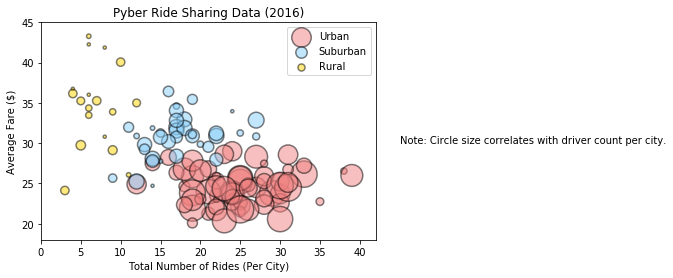

In [110]:
# Obtain the x and y coordinates for each of the three city types

group_city = pyberdf.groupby(['city'])
average_fare = group_city['fare'].mean()
total_rides = group_city['ride_id'].nunique()
total_drivers = group_city['driver_count'].max()
city_type = group_city['type'].max()

city_sum = pd.DataFrame({'Average Fare ($)': average_fare,
                          'Total Number of Rides': total_rides,
                          'Total Number of Drivers': total_drivers,
                          'City Type': city_type})

urban = city_sum.loc[city_sum['City Type'] == 'Urban']
total_rides_urban = urban['Total Number of Rides']
avg_fare_urban = urban['Average Fare ($)']
total_drivers_urban = urban['Total Number of Drivers']

suburban = city_sum.loc[city_sum['City Type'] == 'Suburban']
total_rides_suburban = suburban['Total Number of Rides']
avg_fare_suburban = suburban['Average Fare ($)']
total_drivers_suburban = suburban['Total Number of Drivers']

rural = city_sum.loc[city_sum['City Type'] == 'Rural']
total_rides_rural = rural['Total Number of Rides']
avg_fare_rural = rural['Average Fare ($)']
total_drivers_rural = rural['Total Number of Drivers']

# Build the scatter plots for each city types

urban_plot = plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10, 
                         color='lightcoral', alpha=0.5, edgecolor='black', linewidths=1.5, 
                         label='Urban')
suburban_plot = plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10, 
                            color='lightskyblue', alpha=0.5, edgecolor='black',linewidths=1.5, 
                            label='Suburban')
rural_plot = plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10, 
                         color='gold', alpha=0.5, edgecolor='black',linewidths=1.5, 
                         label='Rural')

# Incorporate the other graph properties

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.xlim((0,42))
plt.ylim((18,45))

# Create a legend

plt.legend(loc= "upper right")

# Incorporate a text label regarding circle size

plt.text(45, 30,"Note: Circle size correlates with driver count per city.")

# Save Figure

plt.savefig('sharing_plot.png')

## Total Fares by City Type

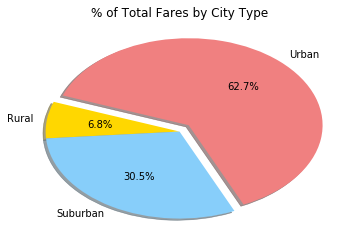

In [111]:
# Calculate Type Percents

fares_by_type = pyberdf.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
fare_sum = fares_by_type.sum()['fare']

# Build Pie Chart

labels = fare_sum.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, .1]
plt.pie(fare_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = True, wedgeprops = {'linewidth': .5,})

plt.title('% of Total Fares by City Type')

# Save Figure

plt.savefig('fare_pie.png')

## Total Rides by City Type

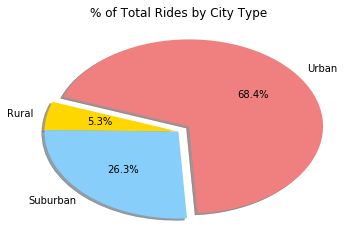

In [112]:
# Calculate Ride Percents

rides_sum = fares_by_type.count()['ride_id']

# Build Pie Chart

labels = rides_sum.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, .1]
plt.pie(rides_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = True, wedgeprops = {'linewidth': .5,})

plt.title('% of Total Rides by City Type')

# Save Figure

plt.savefig('rides_pie.png')

## Total Drivers by City Type

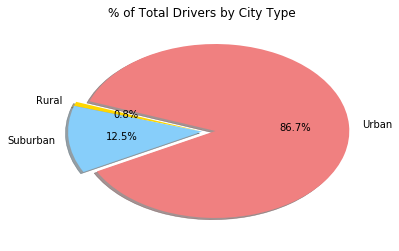

In [113]:
# Calculate Driver Percents

drivers_sum = pyberdf.groupby('type').sum()['driver_count']

# Build Pie Charts

labels = drivers_sum.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0 , 0, .1]
plt.pie(drivers_sum, startangle = 160, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = True, wedgeprops = {'linewidth': .5,})

plt.title('% of Total Drivers by City Type')

# Save Figure

plt.savefig('drivers_pie.png')